In [73]:
import matplotlib.pyplot as plt
import numpy as np

Load the computed integer and floating-point pfbs of 10_000 2048-wide-frames of gaussian random noise. The integer gaussian random noise was generated like so:
```python
ts = np.random.randn(LFRAME * 10000) * (1<<9)
ts = np.asarray(ts, dtype="int")
# saturate for 14 bit adcs
saturate_up_idxs = np.where(ts > (1<<13))
saturate_down_idxs = np.where(ts < -(1<<13))
ts[saturate_up_idxs] = (1<<13)
ts[saturate_down_idxs] = -(1<<13)
```
***The integer PFB used 18 bits internally; the twiddle factors (i.e. sine wave samples) have a bit-depth of 16. Since the ADC outputs 14 bits, time-series data 4-sigma abnormal is saturated.***

The purpose of this test was to see if the integer math of our on chip FFT was responsible for our pathological histograms. Although this is merely a preliminary test, it does not show that this is the case. Moving on we should
1. Do this more thoroughly and systematically, using exactly the same quantization and scaling parameters used in the integer FFTs. 
2. Play with the parameters to see if we can generate anemic histograms. 
3. Examine the FPGA code and look for anything suspicious (perhaps a logic bug in the quantization stage)
4. Think more

In [79]:

int_spec_re = np.load("int_spec_re.npy")
int_spec_im = np.load("int_spec_im.npy")
fp_spec_re = np.load("fp_spec_re.npy")
fp_spec_im = np.load("fp_spec_im.npy")

int_spec_re.shape,int_spec_im.shape,fp_spec_re.shape,fp_spec_im.shape

((9997, 2048), (9997, 2048), (9997, 2048), (9997, 2048))

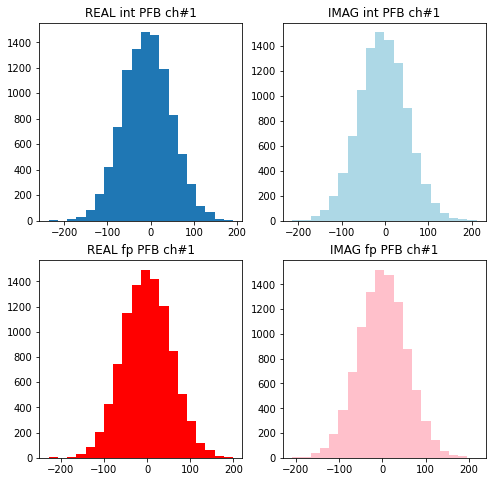

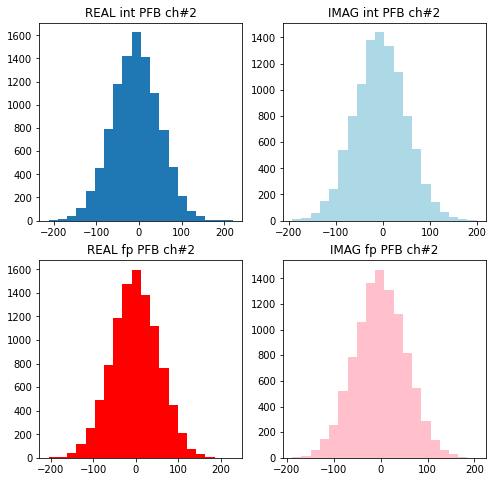

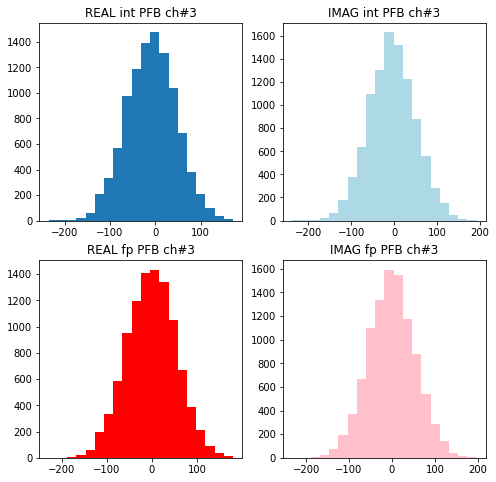

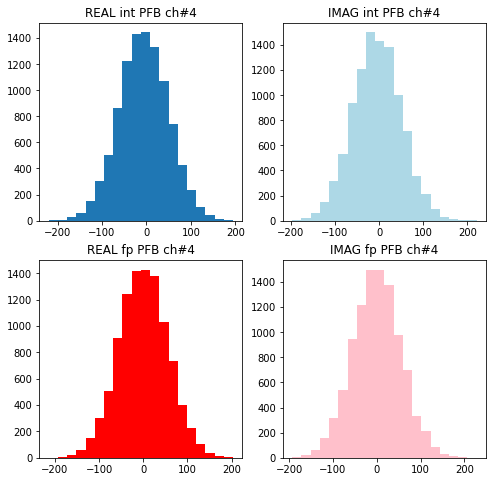

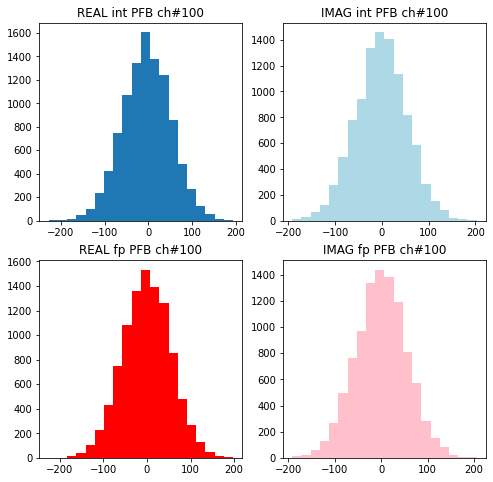

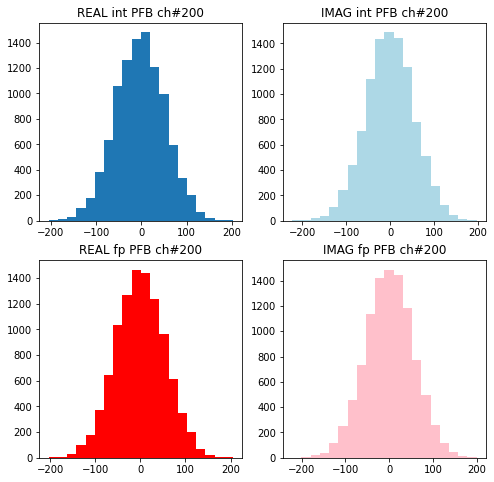

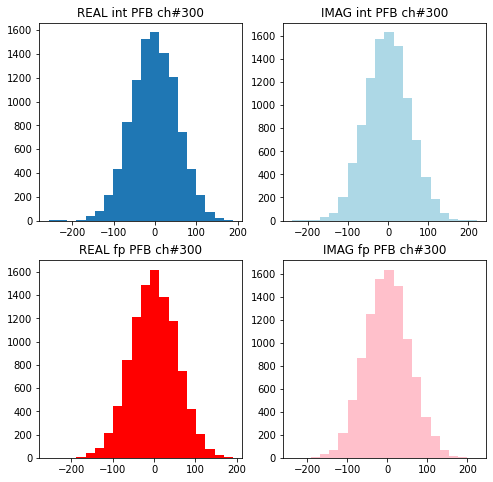

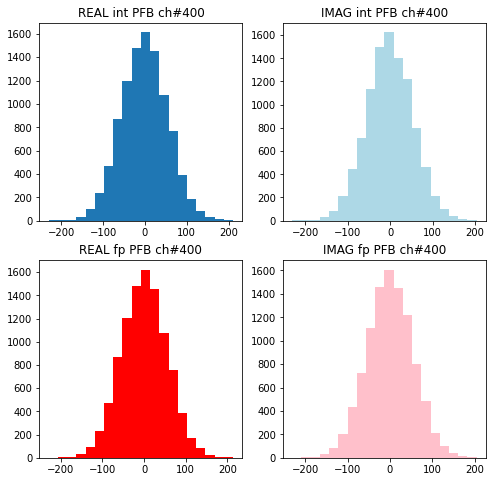

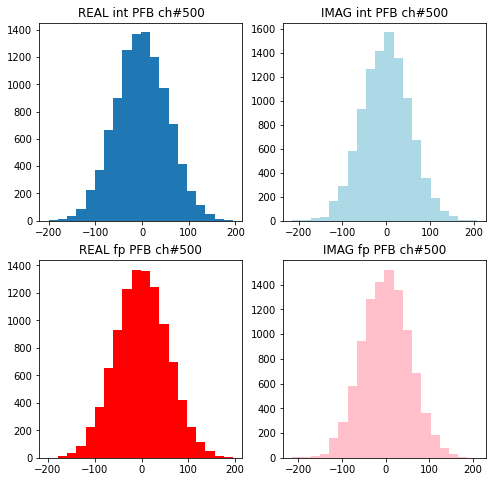

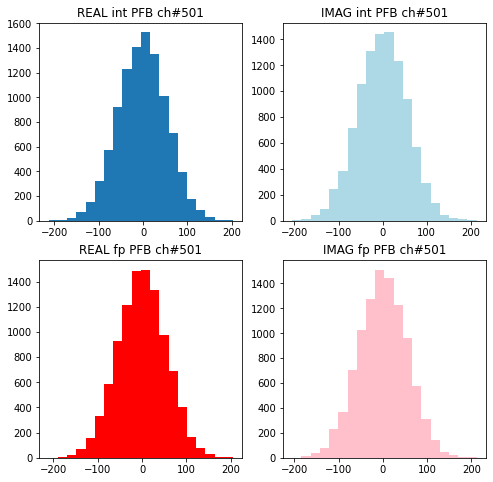

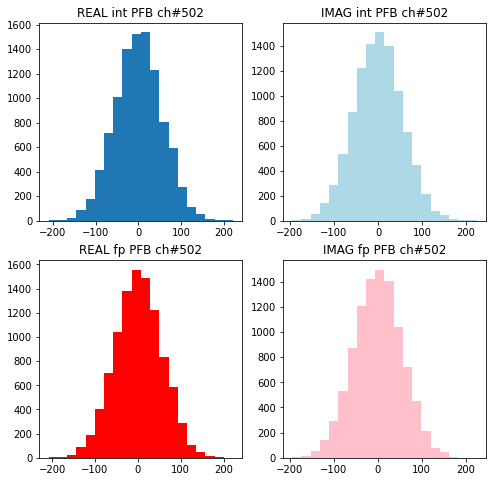

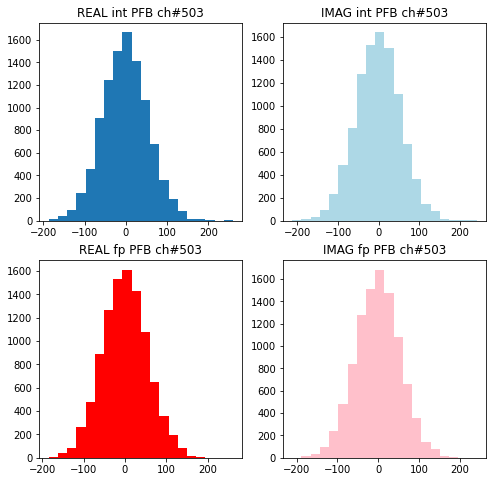

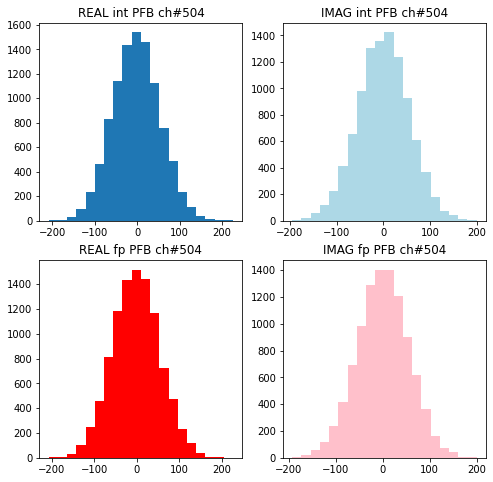

In [80]:
for idx in (1,2,3,4,100,200,300,400,500,501,502,503,504):
    nbins=20
    int_arr_re=int_spec_re[:,idx]
    int_arr_im=int_spec_im[:,idx]
    #int_arr_abs=np.sqrt(arr_re**2 + arr_im**2)
    fp_arr_re=fp_spec_re[:,idx]/2048 # integer FFTs are scaled at each butterfly stage to prevent overflow
    fp_arr_im=fp_spec_im[:,idx]/2048
    
    plt.subplots(figsize=(8,8))
    
    plt.subplot(2,2,1)
    plt.hist(int_arr_re,bins=nbins)
    plt.title(f"REAL int PFB ch#{idx}")
    
    plt.subplot(2,2,2)
    plt.hist(int_arr_im,bins=nbins,color="lightblue")
    plt.title(f"IMAG int PFB ch#{idx}")
    
    plt.subplot(2,2,3)
    plt.hist(fp_arr_re,bins=nbins,color="red")
    plt.title(f"REAL fp PFB ch#{idx}")
    
    plt.subplot(2,2,4)
    plt.hist(fp_arr_im,bins=nbins,color="pink")
    plt.title(f"IMAG fp PFB ch#{idx}")
    
    plt.show()